In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = "DATA/"
FILE_NAME = "heart_failure_clinical_records.csv"

file_path = DATA_FOLDER + FILE_NAME

In [3]:
heart_data = pd.read_csv(file_path)
heart_data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [5]:
heart_data.nunique()

age                          48
anaemia                       2
creatinine_phosphokinase    290
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   203
serum_creatinine             43
serum_sodium                 27
sex                           2
smoking                       2
time                        155
DEATH_EVENT                   2
dtype: int64

In [6]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


## Basic training

In [7]:
X = heart_data.iloc[:, :-1].values
y = heart_data.iloc[:, -1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
#import random

#random.randint(0, 1000)
## 215

In [10]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

def generate_result(model_name, model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred=prediction)
    precision = precision_score(y_test, y_pred=prediction)
    f1 = f1_score(y_test, y_pred=prediction)
    return [model_name, accuracy, precision, f1]

In [11]:
def generate_df(results):
    df = pd.DataFrame(results, columns=["name","accuracy", "precision", "f1"])
    df.set_index("name", inplace = True)
    return df

In [12]:
from sklearn.ensemble import RandomForestClassifier

RF_base = RandomForestClassifier(random_state = 215)
RF_result = generate_result("Simple Random Forest",RF_base)
RF_result

['Simple Random Forest', 0.992, 0.9904761904761905, 0.9873417721518988]

## Testing impact of number of trees

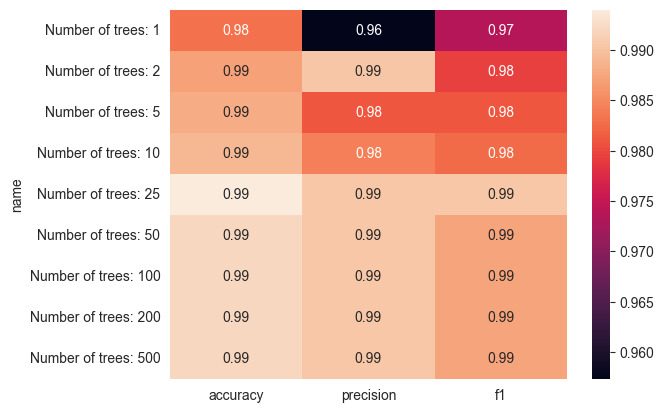

In [13]:
number_of_trees = [1, 2, 5, 10, 25, 50, 100, 200, 500]
results_num_of_trees = []

def test_RF(RF_classifier, result_array, name, param):
    name = name + str(param)
    RF_results = generate_result(name,RF_classifier)
    result_array.append(RF_results)

for number in number_of_trees:
    RF = RandomForestClassifier(n_estimators = number, random_state = 215)
    test_RF(RF, results_num_of_trees, "Number of trees: ", number)

sns.heatmap(generate_df(results_num_of_trees), annot = True)
plt.show()

## Testing impact of bootstrap

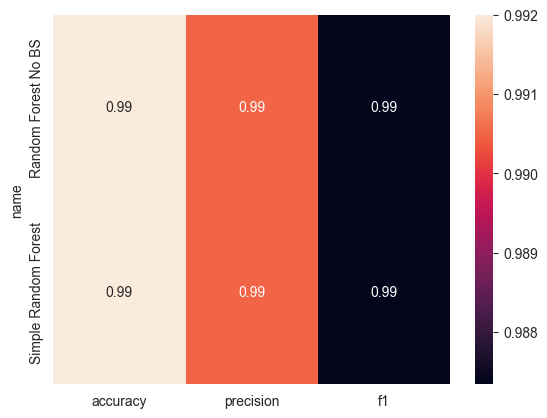

In [14]:
RF_no_bootstrap = RandomForestClassifier(bootstrap = False, random_state = 215)
RF_no_bs_result = generate_result("Random Forest No BS",RF_no_bootstrap)
sns.heatmap(generate_df([RF_no_bs_result, RF_result]), annot = True)
plt.show()

## Testing impact of number of features

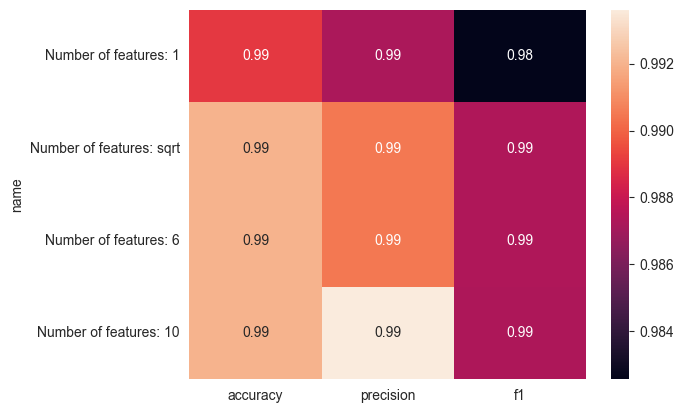

In [15]:
number_of_features = [1, "sqrt", 6, 10]
results_features = []



for number in number_of_features:
    RF = RandomForestClassifier(max_features = number, random_state = 215)
    test_RF(RF, results_features, "Number of features: ", number)
sns.heatmap(generate_df(results_features), annot = True)
plt.show()

## Testing impact of max depth

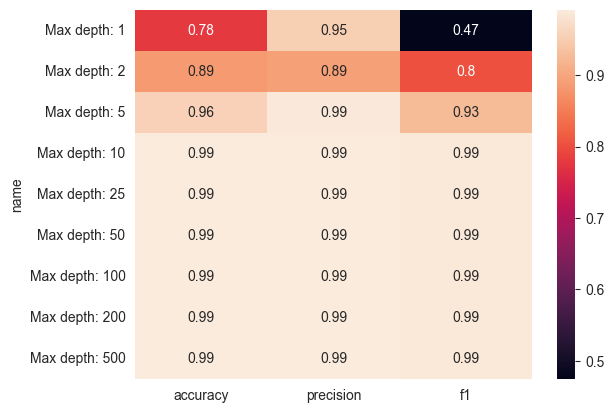

In [16]:
max_depth = [1, 2, 5, 10, 25, 50, 100, 200, 500]
results_depth = []


for number in number_of_trees:
    RF = RandomForestClassifier(max_depth = number, random_state = 215)
    test_RF(RF, results_depth, "Max depth: ", number)
sns.heatmap(generate_df(results_depth), annot = True)
plt.show()

# Comparing with another models

## Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
DT_base = DecisionTreeClassifier()
Dt_result = generate_result("Decision Tree",DT_base)
Dt_result

['Decision Tree', 0.989, 0.9872611464968153, 0.9825673534072901]

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
LR_base = LogisticRegression(max_iter = 10000)
LR_result = generate_result("Logistic Regression",LR_base)
LR_result

['Logistic Regression', 0.846, 0.7839721254355401, 0.7450331125827815]

## Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
NB_base = GaussianNB()
NB_result = generate_result("Naive Bayes",NB_base)
NB_result

['Naive Bayes', 0.822, 0.8564102564102564, 0.65234375]

## K-nearest neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier
KNN_base = KNeighborsClassifier()
KNN_result = generate_result("K-nearest neighbors",KNN_base)
KNN_result

['K-nearest neighbors', 0.956, 0.9333333333333333, 0.930379746835443]

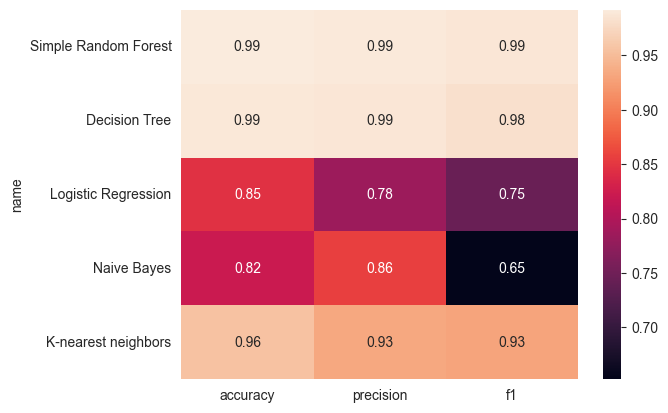

In [22]:
merged_models = [RF_result, Dt_result, LR_result,  NB_result, KNN_result]

sns.heatmap(generate_df(merged_models), annot = True)
plt.show()